# Classification of Movie Genres Based on Synopses


## Business Understanding

Movies are a popular means of entertainment all around the world. Developing a predictive model that automatically generates a movie's genre based on its plot summary is certainly a good idea because there is now a lot of streaming services and websites available and there is a lot more to come. It could also reduce the cost of manually tagging movies.






##### GIT CONFIG

In [1]:
pwd

'/content'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/git-colab-repo/movie-genre-classification

/content/drive/MyDrive/git-colab-repo/movie-genre-classification


In [4]:
!git status

Refresh index: 100% (9/9), done.
On branch pre-processing
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   main.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


pastikan dulu kerja di branch apaa

In [5]:
!git config --global user.email "asmi.amalia23@gmail.com"
!git config --global user.name "naamalia23"

In [ ]:
!git add .
!git commit -m ''
!git push -u origin master

[pre-processing 3ca30c2] git config master-3
 4 files changed, 1 insertion(+), 1 deletion(-)
 create mode 100644 images/FreqOfTopGenres.png
 create mode 100644 images/FreqOrigin.png
 create mode 100644 images/freqOfReleaseYear.png
Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date


##### change to working branch

In [ ]:
!git checkout -b 'pre-processing'

Switched to a new branch 'pre-processing'


In [6]:
!git status

On branch pre-processing
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   main.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


## Data Understanding

The dataset used in this notebook was obtained from kaggle and it contains movie plot summaries scraped from wikipedia. The dataset has 34,886 entries.The following details are contained in the dataset:

1. Release Year - year of release
2. Title - title of the movies
3. Origin/Ethnicity - country of origin of the movies
4. Director - director names associated with the movies
5. Cast - cast name associated with the movies
6. Wiki Page - wikipedia page of the movies
7. Plot - plot summary of the movies
[link text](https://)

## Data Exploration

### Import necessary libraries and packages



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import warnings
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.text import FreqDistVisualizer
!pip install dataframe_image
import dataframe_image as dfi
from mlxtend.feature_selection import ColumnSelector

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.5/398.5 kB 48.6 MB/s eta 0:00:00


Here's a brief summary of the required libraries and packages:

**Data Processing and Visualization:**

1. pandas: Data manipulation library.
2. numpy: Numerical computing library.
3. matplotlib: Plotting library for data visualization.
4. seaborn: Statistical data visualization based on Matplotlib.
5. WordCloud: Generating word clouds from text data.
6. dfi (dataframe_image): Generating images from Pandas DataFrames.
7. FreqDistVisualizer: Visualizing word frequency distributions.

**Text Processing:**

1. nltk: Natural Language Toolkit for text processing.
2. spacy: Natural language processing library. You've downloaded the English 3. language model (en_core_web_sm) using spacy.cli.download and loaded it into nlp.

**Machine Learning and Model Evaluation:**

1. sklearn: Scikit-learn library for machine learning.
2. LogisticRegression: Logistic Regression classifier.
3. DummyClassifier: Dummy Classifier for baseline comparison.
4. MultinomialNB: Naive Bayes classifier for multinomial models.
4. GaussianNB: Naive Bayes classifier for Gaussian-distributed data.
5. train_test_split: Splitting the dataset into training and testing sets.
6. GridSearchCV: Hyperparameter tuning using grid search.
7. Pipeline: Constructing a pipeline of machine learning operations.
8. OneVsRestClassifier: One-vs-the-rest classifier for multi-label classification.
9. RandomForestClassifier: Random Forest classifier.
10. DecisionTreeClassifier: Decision Tree classifier.

**Feature Extraction:**

1. TfidfVectorizer, CountVectorizer: Converting text data into numerical features.

**Other:**

1. warnings: Suppressing warnings.
2. re: Regular expression library.
3. STOPWORDS: Stopwords for filtering out common words.

### Reading dataset into pandas dataframe

In [8]:
# Loading the dataset from the CSV file
movies_df =  pd.read_csv('/content/drive/MyDrive/git-colab-repo/movie-genre-classification/data/wiki_movie_plots_deduped.csv')

# Displaying the first few rows of the DataFrame
movies_df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


### Descriptive Statistics

In [9]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [10]:
movies_df.describe()

,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


In [11]:
movies_df.shape

(34886, 8)

The DataFrame named movies_df comprises movie-related information with 34,886 entries and 8 columns. The dataset's release years range from 1901 to 2017.

## Exploratory Data Analysis

### Movie Distributions by Release Year

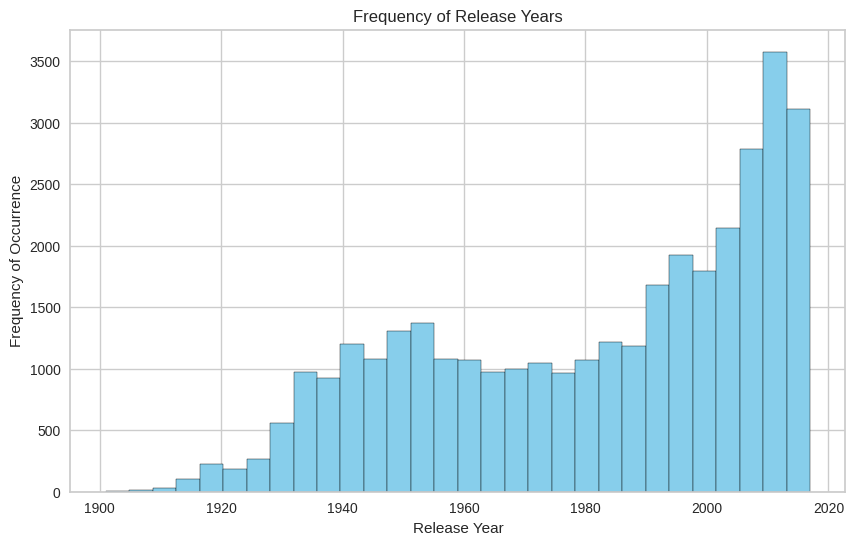

In [12]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a histogram of the 'Release Year' column
ax.hist(movies_df['Release Year'], bins=30, color='skyblue', edgecolor='black')

# Set the title and axis labels
ax.set_title('Frequency of Release Years')
ax.set_xlabel('Release Year')
ax.set_ylabel('Frequency of Occurrence')

# Display the plot
plt.show()

# Save the figure as an image
fig.savefig('/content/drive/MyDrive/git-colab-repo/movie-genre-classification/images/freqOfReleaseYear.png')

### Movie distribution by Movie Origin

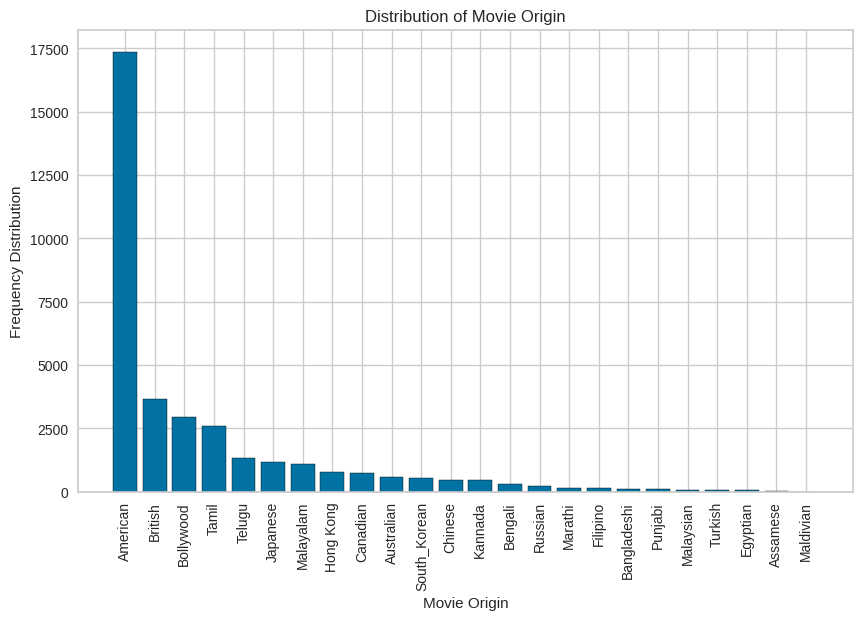

In [13]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a count plot of the 'Origin/Ethnicity' column
origin_counts = movies_df['Origin/Ethnicity'].value_counts()
ax.bar(origin_counts.index, origin_counts, edgecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and axis labels
plt.title('Distribution of Movie Origin')
plt.xlabel('Movie Origin')
plt.ylabel('Frequency Distribution')

# Save the figure as an image
fig.savefig('/content/drive/MyDrive/git-colab-repo/movie-genre-classification/images/FreqOrigin.png')


## Data Cleaning

### Subsetting the dataset and resetting the index

In [14]:
# Subsetting the dataset to include only entries with a known genre
movies_df_subset = movies_df.loc[movies_df['Genre'] != 'unknown']

# Resetting the index and dropping the old index
movies_df_subset.reset_index(drop=True, inplace=True)

### Checking the number of unique values in the genres column

In [15]:
# Count the occurrences of each unique value in the 'Genre' column
genres_counts = movies_df_subset['Genre'].value_counts()

# Print the number of different genres in the dataset
num_unique_genres = len(genres_counts)
print(f'There are {num_unique_genres} different genres in the dataset:')

# Print the count of each genre
print(genres_counts)

There are 2264 different genres in the dataset:
drama                            5964
comedy                           4379
horror                           1167
action                           1098
thriller                          966
                                 ... 
cbc-tv miniseries                   1
bio-drama                           1
national film board docudrama       1
cult drama                          1
horror romantic comedy              1
Name: Genre, Length: 2264, dtype: int64


### Obtaining the top 6 most often occurring genres in the dataset

In [16]:
# Select the top 6 genres based on their occurrences
top_genres = pd.value_counts(movies_df_subset['Genre']).head(6).reset_index()

# Rename the columns for clarity
top_genres.columns = ['Genres', 'Number of Movies']

# Display the resulting DataFrame
top_genres

,Genres,Number of Movies
0,drama,5964
1,comedy,4379
2,horror,1167
3,action,1098
4,thriller,966
5,romance,923


### The dataset's top six genres' movie distribution

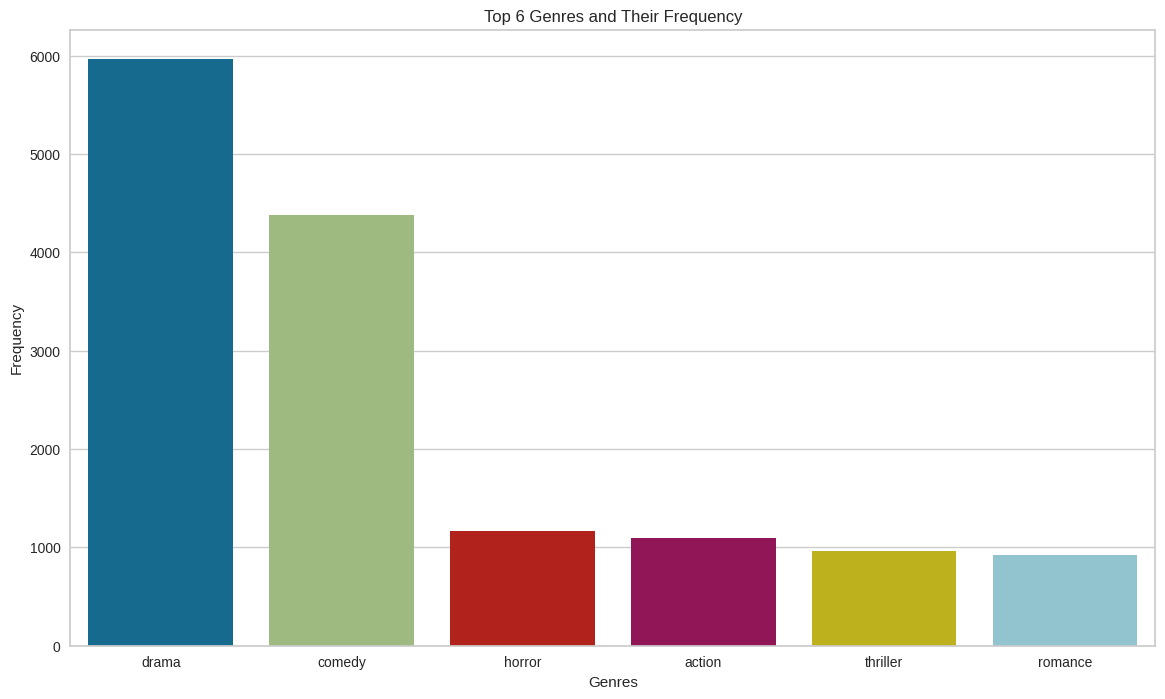

In [17]:
# Assuming 'top_genres' is your DataFrame
fig, ax = plt.subplots(figsize=(14, 8))

# Use seaborn's barplot to visualize the top genres
sns.barplot(x='Genres', y='Number of Movies', data=top_genres)

# Set the title and axis labels
plt.title('Top 6 Genres and Their Frequency')
plt.xlabel('Genres')
plt.ylabel('Frequency')

# Save the figure as an image
fig.savefig('/content/drive/MyDrive/git-colab-repo/movie-genre-classification/images/FreqOfTopGenres.png')

# Display the plot (optional)
plt.show()

### Label Encoding

In [18]:
top_genres_list = ['drama', 'comedy', 'horror', 'action', 'thriller', 'romance']

# Create a new 'labels' column based on conditions and choices using .loc
for genre in top_genres_list:
    movies_df_subset.loc[movies_df_subset['Genre'] == genre, 'labels'] = top_genres_list.index(genre) + 1

# Fill NaN values with 0 (for entries that don't match any genre)
movies_df_subset['labels'].fillna(0, inplace=True)

# Convert 'labels' column to integer type
movies_df_subset['labels'] = movies_df_subset['labels'].astype(int)

<ipython-input-18-080055e0132d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_subset.loc[movies_df_subset['Genre'] == genre, 'labels'] = top_genres_list.index(genre) + 1
<ipython-input-18-080055e0132d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_subset['labels'].fillna(0, inplace=True)
<ipython-input-18-080055e0132d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [19]:
movies_df_subset.sample(10)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,labels
1419,1933,The Cohens and Kellys in Trouble,American,George Stevens,"Charles Murray, Andy Devine, Maureen O'Sullivan",comedy,https://en.wikipedia.org/wiki/The_Cohens_and_K...,"Kelly's daughter falls for a revenue agent, an...",2
13648,2002,Blood Work,American,Clint Eastwood,"Clint Eastwood, Jeff Daniels, Anjelica Huston,...",crime drama,https://en.wikipedia.org/wiki/Blood_Work_(film),"During a homicide investigation, FBI agent Ter...",0
19320,1967,Jeremy Summers,British,"Bob Cummings, Margaret Lee",Mystery,british-german co-production,https://en.wikipedia.org/wiki/Five_Golden_Dragons,The Five Golden Dragons are an international c...,0
13988,2003,The Room,American,Tommy Wiseau,"Tommy Wiseau, Juliette Danielle",drama,https://en.wikipedia.org/wiki/The_Room_(film),Johnny is a successful banker who lives in a S...,1
28663,2015,About Love,Russian,Anna Melikyan,"Renata Litvinova,\nKristina Isaykina,\nMariya ...","comedy, drama film",https://en.wikipedia.org/wiki/About_Love_(2015...,"The audience gathered at the ""Strelka"" to list...",0
27730,1958,The H-Man,Japanese,Ishirō Honda,Yumi Shirakawa,science fiction,https://en.wikipedia.org/wiki/The_H-Man,(Japanese Version)\nFollowing a routine nuclea...,0
4306,1946,The Unknown,American,Henry Levin,"Karen Morley, Jeff Donnell",drama,https://en.wikipedia.org/wiki/The_Unknown_(194...,Relatives arrive for the reading of a will at ...,1
7226,1959,Ten Seconds to Hell,American,Robert Aldrich,"Jack Palance, Jeff Chandler",war,https://en.wikipedia.org/wiki/Ten_Seconds_to_Hell,"In post-war Berlin, British Major Haven (Richa...",0
24372,2008,Humne Jeena Seekh Liya,Bollywood,Milind Ukey,"Siddharth Chandekar, Mrunmayi Deshpande",comedy,https://en.wikipedia.org/wiki/Humne_Jeena_Seek...,Humne Jeena Seekh Liya is adapted from a Marat...,0
2898,1940,Trail of the Vigilantes,American,Allan Dwan,"Franchot Tone, Warren William, Broderick Crawford",western,https://en.wikipedia.org/wiki/Trail_of_the_Vig...,"Undercover agent Tim ""Kansas"" Mason is sent fr...",0


In [20]:
label_counts = movies_df_subset['labels'].value_counts()

# Display the counts
print(label_counts)

0    14306
1     5964
2     4379
3     1167
4     1098
5      966
6      923
Name: labels, dtype: int64


### Filtering label columns

In [21]:
movies_df_label = movies_df_subset[movies_df_subset['labels'] != 0].reset_index(drop=True)

Filtering the movies_df_subset dataframe such that it only contains a single genre element labelled as 1-6.

In [22]:
movies_df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14497 entries, 0 to 14496
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      14497 non-null  int64 
 1   Title             14497 non-null  object
 2   Origin/Ethnicity  14497 non-null  object
 3   Director          14497 non-null  object
 4   Cast              14272 non-null  object
 5   Genre             14497 non-null  object
 6   Wiki Page         14497 non-null  object
 7   Plot              14497 non-null  object
 8   labels            14497 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1019.4+ KB


### Table displaying the genre label allocations

In [23]:
assigned_label = pd.DataFrame(
    sorted(
        list(zip(movies_df_label['Genre'].unique(), movies_df_label['labels'].unique())),
        key=lambda x: x[1],
        reverse=False
    ),
    columns=['genres', 'labels']
)

merged_df = pd.merge(assigned_label, top_genres, left_on='genres', right_on='Genres')

# Drop the duplicate 'Genres' column after the merge
merged_df.drop('Genres', axis=1, inplace=True)

# Display the resulting DataFrame
print(merged_df)

     genres  labels  Number of Movies
0     drama       1              5964
1    comedy       2              4379
2    horror       3              1167
3    action       4              1098
4  thriller       5               966
5   romance       6               923


### Dropping unnecessary columns

In [24]:
# unnecessary columns for this project
columns_to_drop = ['Release Year', 'Origin/Ethnicity', 'Director', 'Cast', 'Wiki Page']

# Drop unnecessary columns
movies_df_label.drop(columns=columns_to_drop, inplace=True)

In [ ]:
movies_df_label.head()

,Title,Genre,Plot,labels
0,The Suburbanite,comedy,The film is about a family who move to the sub...,2
1,How Brown Saw the Baseball Game,comedy,Before heading out to a baseball game at a nea...,2
2,Laughing Gas,comedy,The plot is that of a black woman going to the...,2
3,The Adventures of Dollie,drama,On a beautiful summer day a father and mother ...,1
4,The Black Viper,drama,A thug accosts a girl as she leaves her workpl...,1


## Preprocessing data in the 'Plot' column

Here is an example of a storyline summary from 'Plot' column

In [ ]:
movies_df_label['Plot'][2]

'The plot is that of a black woman going to the dentist for a toothache and being given laughing gas. On her way walking home, and in other situations, she can\'t stop laughing, and everyone she meets "catches" the laughter from her, including a vendor and police officers.'

In [ ]:
import os
path = "/content/drive/MyDrive/git-colab-repo/movie-genre-classification" # /content is pretty much the root. you can choose other path in your colab workspace
os.chdir(path)